https://colab.research.google.com/drive/1a8R54TUFHgrwBASTWk-aYf9lXmagCH1H

In [1]:
pip install stanza

     |████████████████████████████████| 337 kB 5.0 MB/s 


In [1]:
import stanza
stanza.download('en',package = 'craft')

2021-08-07 11:30:29 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |
| depparse  | craft   |
| pretrain  | craft   |



2021-08-07 11:31:04 INFO: Finished downloading models and saved to /root/stanza_resources.


Load modules and dataset



In [2]:
from IPython import display
import math
from pprint import pprint #pretty print json & list
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns #add stype to matplolib graphs 
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [37]:
import gensim 
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from gensim.parsing.preprocessing import strip_numeric,strip_multiple_whitespaces, strip_punctuation, strip_short, strip_tags

In [127]:
from collections import Counter 

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_csv('drive/MyDrive/bbc_test_novideos_v3(sentiment).csv',encoding = 'latin1')

In [26]:
df.head()

,link,text,Sentiment_1,Sentiment_2
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1


In [30]:
new_sw = ['people','say','says','said','could','one','would','take','want','have','she','he','give','told','know','but','health','month','day','year', 'minute','second','hundred','thousand','however']
stop_words = STOPWORDS.union(set(new_sw))

In [31]:
pubmed_stoplist = ['a','about','again','all','almost', 'also','although','always',\
                   'among','an','and','another','any','are','as','at','be','because',\
                   'been','before','being','between','both','but','by','can','could',\
                   'did','do','does','done','due','during','each','either','enough', \
                   'especially','etc','for','found', 'from','further','had','is','it',\
                   'has','have','having','here','how','however','i','if','in','into',\
                   'its','itself','just','kg','km', 'made','mainly','make','may','mg',\
                   'might','ml','mm','most','mostly','must','nearly','neither','no',\
                   'nor','obtained','of','often','on','our','overall','perhaps','pmid',\
                   'quite','rather','really','regarding','seem','seen','several',\
                   'should','show','showed','shown','shows','significantly','since',\
                   'so','some','such','than','that','the','their','theirs','them',\
                   'then','there','therefore','these','they','this','those','through',\
                   'thus','to','upon','use','used','using','various','very', 'was','we',\
                   'were','what','when', 'which','while','with','within','without','would']
stop_words = STOPWORDS.union(set(pubmed_stoplist))

In [33]:
print(stop_words)

frozenset({'anyway', 'whereupon', 'please', 'those', 'thereafter', 'be', 'moreover', 'eight', 'un', 'thereby', 'are', 'almost', 'until', 'through', 'out', 'anything', 'has', 'forty', 'throughout', 'pmid', 'behind', 'seeming', 'which', 'six', 'he', 'indeed', 'enough', 'whether', 'kg', 'above', 'yours', 'first', 'two', 'before', 'very', 'otherwise', 'whose', 'per', 'hereby', 'becoming', 'cannot', 'front', 'interest', 'but', 'below', 'most', 'sixty', 'this', 'nine', 'was', 'among', 'ourselves', 'whom', 'latterly', 'during', 'for', 'alone', 'fifteen', 'five', 'the', 'ten', 'am', 'full', 'me', 'some', 'wherever', 'towards', 'especially', 'being', 'just', 'mine', 'at', 'overall', 'last', 'over', 'de', 'hasnt', 'had', 'does', 'don', 'become', 'where', 'quite', 'somewhere', 'side', 'an', 'each', 'system', 'ever', 'bottom', 'up', 'nowhere', 'should', 'may', 'across', 'seem', 'its', 'used', 'both', 'really', 'less', 'keep', 'next', 'can', 'whither', 'call', 'thence', 'computer', 'nobody', 'somet

In [46]:
def cleaning(text):
  clean =[]
  text = strip_multiple_whitespaces(text)
  text = strip_numeric(text)
  text = strip_punctuation(text)
  text = strip_tags(text)
  text = strip_short(text,minsize=3)
  text = remove_stopwords(text)
  # lower case, de-accents.  Convert the texts into a list of tokens
  for token in gensim.utils.simple_preprocess(text, deacc=True):
      clean.append(token)
  return clean

In [47]:
df['clean_text'] = df.text.apply(cleaning)

In [48]:
df.head()

,link,text,Sentiment_1,Sentiment_2,clean_text
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0,"[psychiatrists, urged, ask, children, mental, ..."
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1,"[the, number, adults, seeking, help, cope, alc..."
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1,"[the, current, checking, newborns, hip, proble..."
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1,"[calorie, filled, easter, eggs, sold, shops, f..."
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1,"[she, desperate, end, currently, toothbrush, i..."


In [44]:
nlp_craft = stanza.Pipeline('en',package = 'craft',processor = 'pos,tokenize,lemma',tokenize_pretokenized = True)

2021-08-07 11:59:48 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |
| depparse  | craft   |

2021-08-07 11:59:48 INFO: Use device: cpu
2021-08-07 11:59:48 INFO: Loading: tokenize
2021-08-07 11:59:48 INFO: Loading: pos
2021-08-07 11:59:49 INFO: Loading: lemma
2021-08-07 11:59:49 INFO: Loading: depparse
2021-08-07 11:59:49 INFO: Done loading processors!


In [49]:
df['lem_text'] = df.clean_text.apply(nlp_craft)

In [50]:
df.head()

,link,text,Sentiment_1,Sentiment_2,clean_text,lem_text
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0,"[psychiatrists, urged, ask, children, mental, ...","[\n [\n {\n ""id"": 1,\n ""text"": ""..."
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1,"[the, number, adults, seeking, help, cope, alc...","[\n [\n {\n ""id"": 1,\n ""text"": ""..."
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1,"[the, current, checking, newborns, hip, proble...","[\n [\n {\n ""id"": 1,\n ""text"": ""..."
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1,"[calorie, filled, easter, eggs, sold, shops, f...","[\n [\n {\n ""id"": 1,\n ""text"": ""..."
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1,"[she, desperate, end, currently, toothbrush, i...","[\n [\n {\n ""id"": 1,\n ""text"": ""..."


In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')

new_words = {
    'to attack':-0.5,
    'backwards':-0.5,
    'alert':0.5,
    'anxiety disorder':-0.4,
    'baal':-0.4,
    'sucks':-0.4,
    'shortness of breath':-0.5,
    'side effect':-0.4,
    'bladder infection':-0.5,
    'bleed':-0.5,
    'blood loss':-0.5,
    'stomachache':-0.5,
    'decisive':0.4,
    'intenstinal complaints':-0.4,
    'depression':-0.5,
    'diarrhea':-0.5,
    'breakthrough':0.5,
    'down':-0.4,
    'giddy':-0.4,
    'dream':0.4,
    'dizziness':-0.5,
    'appetite':0.4,
    'misery':-0.5,
    'energy':0.5,
    'worse':-0.4,
    'to enjoy':0.5,
    'swollen':-0.5,
    'hair loss':-0.6,
    'heart attack':-0.5,
    'heart problems':-0.4,
    'palpitations':-0.4,
    'unfortunate':-0.5,
    'help out':0.5,
    'cough':-0.4,
    'headache':-0.5,
    'hayfever':-0.5,
    'skin rash':-0.4,
    'delicious':0.5,
    'incontinence':-0.4,
    'itching':-0.5,
    'sore throat':-0.5,
    'complaint':-0.4,
    'complaints':-0.4,
    'popping':-0.4,
    'banging':-0.5,
    'fever':-0.4,
    'short of breath':-0.4,
    'cramp':-0.4,
    'stomach upset':-0.4,
    'stomach cramps':-0.4,
    'migraine':-0.4,
    'nausea':-0.6,
    'fatigue':-0.5,
    'nightmare':-0.5,
    'constipation':-0.5,
    'unrest':-0.4,
    'ignite':-0.4,
    'inflammation':-0.4,
    'tinnitus':-0.5,
    'rush':-0.5,
    'excited':0.4,
    'stuffed':-0.5,
    'hot flash':-0.4,
    'throw up':-0.6,
    'panic attack':-0.4,
    'pain':-0.4,
    'positive':0.4,
    'fun':0.4,
    'problem':-0.4,
    'reaction':-0.4,
    'rheumatism':-0.5,
    'chills':-0.5,
    'mess':-0.5,
    'crap':-0.5,
    'peace':0.5,
    'calmer':0.5,
    'groom':-0.5,
    'muscle strain':-0.5,
    'more stable':0.5,
    'stab':-0.4,
    'mood swings':-0.5,
    'disorder':-0.5,
    'good luck':0.6,
    'drowsiness':-0.3,
    'satisfaction':0.5,
    'tingling':-0.4,
    'topper':0.6,
    'junk':-0.6,
    'equipped':0.5,
    'improved':-0.5,
    'improvement':0.6,
    'sad':-0.5,
    'common cold':-0.3,
    'lighting':0.5,
    'fatigue':-0.4,
    'trust':0.4,
    'dirty':-0.3,
    'progress':0.3,
    'to work':0.5,
    'panacea':0.7,
    'security':0.4,
    'self confidence':0.4
}



/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [52]:
sia = SIA()
sia.lexicon.update(new_words)

In [57]:
def join_text(text_list):
  return' '.join(text_list)

In [58]:
df['joint_text'] = df.clean_text.apply(join_text)

In [53]:
def polarity(text):
  pol_score = sia.polarity_scores(text)
  return pol_score

In [60]:
df['polarity_score'] = df.joint_text.apply(polarity)

In [61]:
df.head()

,link,text,Sentiment_1,Sentiment_2,clean_text,lem_text,joint_text,polarity_score
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0,"[psychiatrists, urged, ask, children, mental, ...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",psychiatrists urged ask children mental health...,"{'neg': 0.138, 'neu': 0.794, 'pos': 0.068, 'co..."
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1,"[the, number, adults, seeking, help, cope, alc...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",the number adults seeking help cope alcoholic ...,"{'neg': 0.194, 'neu': 0.639, 'pos': 0.167, 'co..."
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1,"[the, current, checking, newborns, hip, proble...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",the current checking newborns hip problems fai...,"{'neg': 0.163, 'neu': 0.811, 'pos': 0.026, 'co..."
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1,"[calorie, filled, easter, eggs, sold, shops, f...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",calorie filled easter eggs sold shops far earl...,"{'neg': 0.082, 'neu': 0.814, 'pos': 0.104, 'co..."
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1,"[she, desperate, end, currently, toothbrush, i...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",she desperate end currently toothbrush inside ...,"{'neg': 0.158, 'neu': 0.644, 'pos': 0.198, 'co..."


In [62]:
df.polarity_score[0]

{'compound': -0.981, 'neg': 0.138, 'neu': 0.794, 'pos': 0.068}

In [69]:
def label(polarity_score):
  if polarity_score['compound'] > 0.2 :
    return 1
  elif polarity_score['compound'] < -0.2 :
    return -1
  else:
    return 0

In [70]:
 df['label']=df.polarity_score.apply(label)

In [71]:
df.head()

,link,text,Sentiment_1,Sentiment_2,clean_text,lem_text,joint_text,polarity_score,label
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0,"[psychiatrists, urged, ask, children, mental, ...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",psychiatrists urged ask children mental health...,"{'neg': 0.138, 'neu': 0.794, 'pos': 0.068, 'co...",-1
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1,"[the, number, adults, seeking, help, cope, alc...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",the number adults seeking help cope alcoholic ...,"{'neg': 0.194, 'neu': 0.639, 'pos': 0.167, 'co...",-1
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1,"[the, current, checking, newborns, hip, proble...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",the current checking newborns hip problems fai...,"{'neg': 0.163, 'neu': 0.811, 'pos': 0.026, 'co...",-1
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1,"[calorie, filled, easter, eggs, sold, shops, f...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",calorie filled easter eggs sold shops far earl...,"{'neg': 0.082, 'neu': 0.814, 'pos': 0.104, 'co...",1
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1,"[she, desperate, end, currently, toothbrush, i...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",she desperate end currently toothbrush inside ...,"{'neg': 0.158, 'neu': 0.644, 'pos': 0.198, 'co...",1


In [74]:
df.loc[df['label'] == 0]

,link,text,Sentiment_1,Sentiment_2,clean_text,lem_text,joint_text,polarity_score,label
42,https://www.bbc.co.uk/news/uk-england-essex-47...,A baby who had surgery on her spine while stil...,1,1,"[baby, surgery, spine, mother, womb, home, fam...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",baby surgery spine mother womb home family bri...,"{'neg': 0.089, 'neu': 0.822, 'pos': 0.089, 'co...",0
44,https://www.bbc.co.uk/news/health-47937405,Widely held myths about sleep are damaging our...,-1,-1,"[widely, held, myths, sleep, damaging, health,...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",widely held myths sleep damaging health mood s...,"{'neg': 0.127, 'neu': 0.746, 'pos': 0.128, 'co...",0


In [75]:
df.loc[df['label'] == 1]

,link,text,Sentiment_1,Sentiment_2,clean_text,lem_text,joint_text,polarity_score,label
3,https://www.bbc.co.uk/news/health-47735108,Calorie-filled Easter eggs are being sold in s...,-1,-1,"[calorie, filled, easter, eggs, sold, shops, f...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",calorie filled easter eggs sold shops far earl...,"{'neg': 0.082, 'neu': 0.814, 'pos': 0.104, 'co...",1
4,https://www.bbc.co.uk/news/health-47749025,"""She is so desperate to end it all, she curren...",-1,-1,"[she, desperate, end, currently, toothbrush, i...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",she desperate end currently toothbrush inside ...,"{'neg': 0.158, 'neu': 0.644, 'pos': 0.198, 'co...",1
6,https://www.bbc.co.uk/news/newsbeat-47770982,"The sun is shining on your skin, there's a bre...",0,1,"[the, sun, shining, skin, breeze, hair, handed...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",the sun shining skin breeze hair handed coconu...,"{'neg': 0.131, 'neu': 0.721, 'pos': 0.148, 'co...",1
9,https://www.bbc.co.uk/news/health-47735253,Controversial vaginal mesh implants can be off...,-1,-1,"[controversial, vaginal, mesh, implants, offer...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",controversial vaginal mesh implants offered nh...,"{'neg': 0.176, 'neu': 0.639, 'pos': 0.185, 'co...",1
11,https://www.bbc.co.uk/news/uk-northern-ireland...,Do you ever struggle to tell your left from yo...,0,0,"[struggle, tell, left, right, maybe, driving, ...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",struggle tell left right maybe driving giving ...,"{'neg': 0.057, 'neu': 0.717, 'pos': 0.226, 'co...",1
12,https://www.bbc.co.uk/news/health-47707954,A speedy 'non-surgical' nose job that takes ju...,0,0,"[speedy, non, surgical, nose, job, takes, minu...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",speedy non surgical nose job takes minutes pos...,"{'neg': 0.089, 'neu': 0.758, 'pos': 0.153, 'co...",1
13,https://www.bbc.co.uk/news/newsbeat-47787138,People in the UK are more likely to combine dr...,-1,-1,"[people, likely, combine, drugs, sex, canada, ...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",people likely combine drugs sex canada austral...,"{'neg': 0.06, 'neu': 0.818, 'pos': 0.122, 'com...",1
15,https://www.bbc.co.uk/news/world-us-canada-477...,A 61-year-old Nebraskan woman has told of her ...,1,1,"[year, old, nebraskan, woman, told, joy, givin...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",year old nebraskan woman told joy giving birth...,"{'neg': 0.103, 'neu': 0.719, 'pos': 0.179, 'co...",1
16,https://www.bbc.co.uk/news/world-us-canada-477...,US President Donald Trump has said he wants to...,-1,-1,"[president, donald, trump, said, wants, wait, ...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",president donald trump said wants wait electio...,"{'neg': 0.052, 'neu': 0.809, 'pos': 0.138, 'co...",1
17,https://www.bbc.co.uk/news/health-47787908,A growing number of parents are confused about...,0,0,"[growing, number, parents, confused, vaccinate...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",growing number parents confused vaccinate chil...,"{'neg': 0.088, 'neu': 0.731, 'pos': 0.18, 'com...",1


In [76]:
df.loc[df['label'] == -1]

,link,text,Sentiment_1,Sentiment_2,clean_text,lem_text,joint_text,polarity_score,label
0,https://www.bbc.co.uk/news/health-47749964,Psychiatrists are being urged to ask children ...,-1,0,"[psychiatrists, urged, ask, children, mental, ...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",psychiatrists urged ask children mental health...,"{'neg': 0.138, 'neu': 0.794, 'pos': 0.068, 'co...",-1
1,https://www.bbc.co.uk/news/uk-47751285,The number of adults seeking help to cope with...,-1,-1,"[the, number, adults, seeking, help, cope, alc...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",the number adults seeking help cope alcoholic ...,"{'neg': 0.194, 'neu': 0.639, 'pos': 0.167, 'co...",-1
2,https://www.bbc.co.uk/news/health-47735103,The current system of checking newborns for hi...,-1,1,"[the, current, checking, newborns, hip, proble...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",the current checking newborns hip problems fai...,"{'neg': 0.163, 'neu': 0.811, 'pos': 0.026, 'co...",-1
5,https://www.bbc.co.uk/news/uk-northern-ireland...,A prescription drug linked to 33 deaths in 201...,-1,1,"[prescription, drug, linked, deaths, northern,...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",prescription drug linked deaths northern irela...,"{'neg': 0.119, 'neu': 0.781, 'pos': 0.1, 'comp...",-1
7,https://www.bbc.co.uk/news/world-asia-china-47...,China says it will crack down on all types of ...,0,0,"[china, says, crack, types, synthetic, opioid,...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",china says crack types synthetic opioid fentan...,"{'neg': 0.191, 'neu': 0.703, 'pos': 0.106, 'co...",-1
8,https://www.bbc.co.uk/news/health-47771688,Pregnant women in England will be able to get ...,1,1,"[pregnant, women, england, able, new, type, bl...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",pregnant women england able new type blood tes...,"{'neg': 0.169, 'neu': 0.699, 'pos': 0.132, 'co...",-1
10,https://www.bbc.co.uk/news/science-environment...,The countdown has begun to the launch of one o...,-1,1,"[the, countdown, begun, launch, world, boldest...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",the countdown begun launch world boldest attem...,"{'neg': 0.219, 'neu': 0.678, 'pos': 0.102, 'co...",-1
14,https://www.bbc.co.uk/news/world-latin-america...,A judge in Brazil has ordered identical twin b...,-1,-1,"[judge, brazil, ordered, identical, twin, brot...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",judge brazil ordered identical twin brothers p...,"{'neg': 0.152, 'neu': 0.801, 'pos': 0.047, 'co...",-1
18,https://www.bbc.co.uk/news/health-47734296,The food we eat is putting 11 million of us in...,-1,0,"[the, food, eat, putting, million, early, grav...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",the food eat putting million early grave year ...,"{'neg': 0.17, 'neu': 0.713, 'pos': 0.118, 'com...",-1
19,https://www.bbc.co.uk/news/uk-scotland-47803975,The routine vaccination of girls with the HPV ...,0,1,"[the, routine, vaccination, girls, hpv, vaccin...","[\n [\n {\n ""id"": 1,\n ""text"": ""...",the routine vaccination girls hpv vaccine scot...,"{'neg': 0.168, 'neu': 0.693, 'pos': 0.139, 'co...",-1


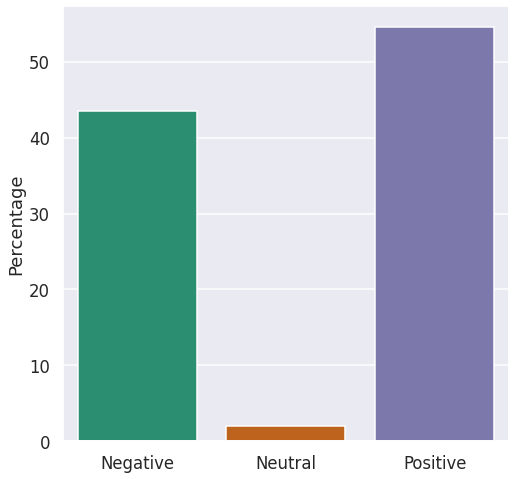

In [77]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [94]:
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pos_text = df.joint_text[df.label ==1]
list(pos_text)

In [135]:
pos_text_list = pos_text.str.split()

In [139]:
print(pos_text_list[:10])

3     [calorie, filled, easter, eggs, sold, shops, f...
4     [she, desperate, end, currently, toothbrush, i...
6     [the, sun, shining, skin, breeze, hair, handed...
9     [controversial, vaginal, mesh, implants, offer...
11    [struggle, tell, left, right, maybe, driving, ...
12    [speedy, non, surgical, nose, job, takes, minu...
13    [people, likely, combine, drugs, sex, canada, ...
15    [year, old, nebraskan, woman, told, joy, givin...
16    [president, donald, trump, said, wants, wait, ...
17    [growing, number, parents, confused, vaccinate...
Name: joint_text, dtype: object


In [141]:
pos_text_list_join = [item for text in pos_text_list for item in text]

In [143]:
pos_freq = Counter(word for word in pos_text_list_join)

In [144]:
pos_freq.most_common(20)

[('said', 245),
 ('the', 221),
 ('people', 178),
 ('says', 123),
 ('health', 95),
 ('but', 80),
 ('like', 79),
 ('year', 68),
 ('children', 65),
 ('time', 63),
 ('she', 60),
 ('years', 60),
 ('patients', 60),
 ('nhs', 58),
 ('study', 58),
 ('treatment', 57),
 ('university', 57),
 ('women', 56),
 ('told', 55),
 ('risk', 55)]

In [146]:
neg_text = df.text[df.label == -1]
list(neg_text)
neg_text_list = neg_text.str.split()
neg_text_list_join = [item for text in neg_text_list for item in text]
neg_freq = Counter(word for word in neg_text_list_join)
neg_freq.most_common(20)

[('the', 1542),
 ('to', 930),
 ('of', 903),
 ('and', 779),
 ('a', 729),
 ('in', 669),
 ('is', 401),
 ('that', 373),
 ('was', 311),
 ('for', 303),
 ('with', 236),
 ('be', 228),
 ('The', 224),
 ('are', 217),
 ('as', 212),
 ('have', 201),
 ('it', 187),
 ('on', 183),
 ('she', 156),
 ('at', 154)]

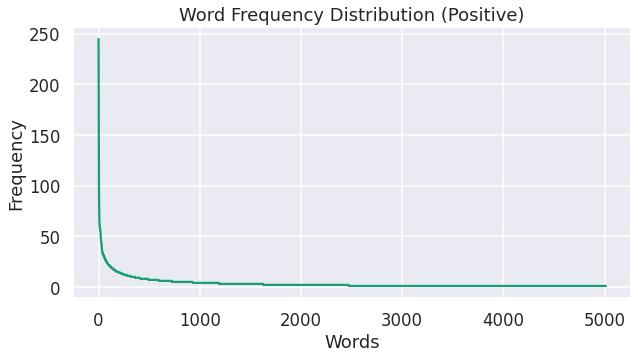

In [147]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

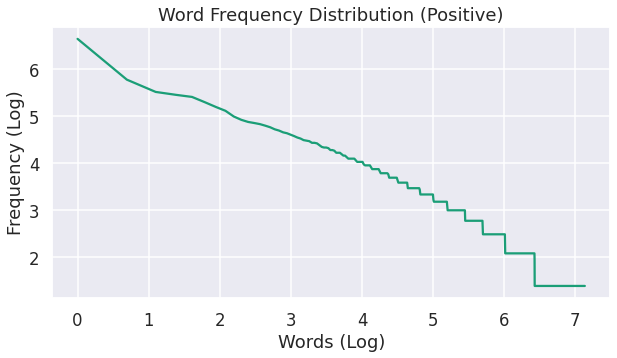

In [148]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [150]:
pos_list = [i[0] for i in pos_freq.most_common(50)]

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

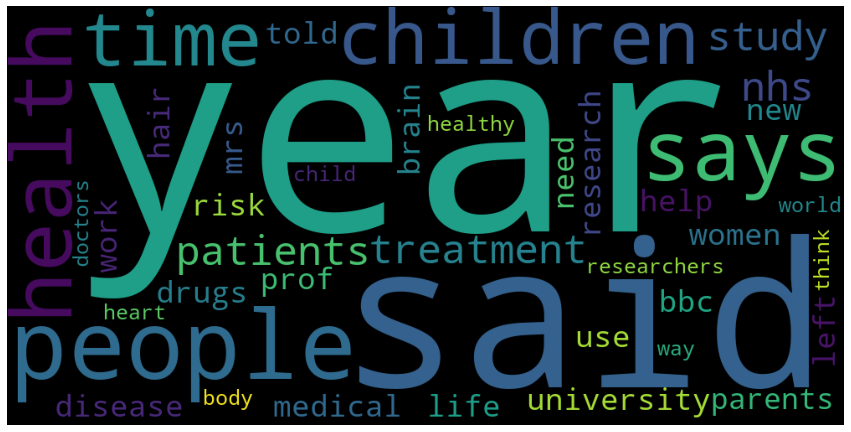

In [152]:
#convert list to string and generate
unique_string=(" ").join(pos_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

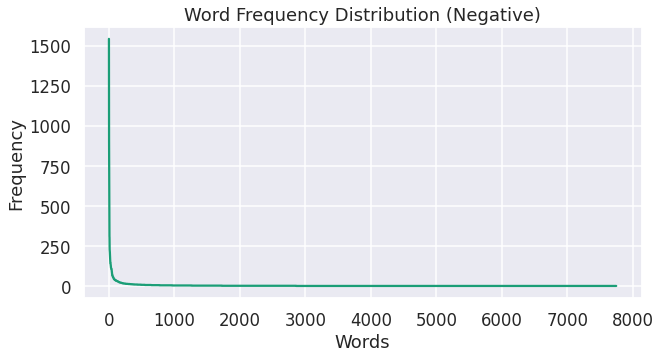

In [153]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

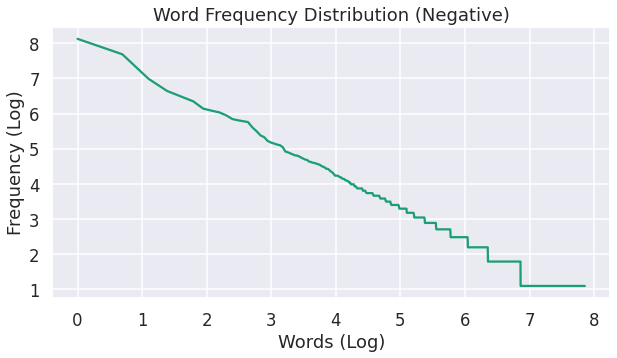

In [154]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [155]:
neg_word_list = [i[0] for i in neg_freq.most_common(50)]

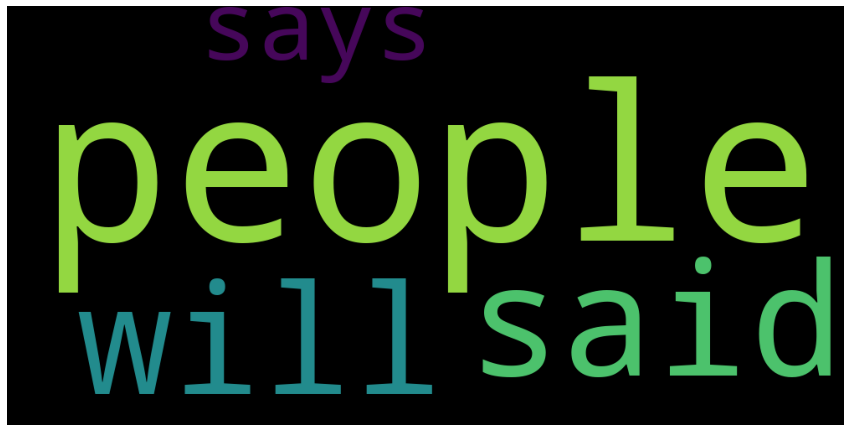

In [156]:
neg_unique_string=(" ").join(neg_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(neg_unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
sentiment_label =df.iloc[:, 1]
comparison = np.where(sentiment_label == df2['label'], True, False)

In [ ]:
print(comparison)

[ True  True  True False False  True False False  True False  True False
 False False  True  True False False  True False False  True False False
  True False False False  True False False False False False  True False
  True  True False False  True False  True False  True  True  True  True
  True False False False False False  True False False False  True False
 False False False False  True False False  True False False False False
 False  True False  True  True  True False False False  True False  True
  True False False  True False  True False False False  True  True False
 False False False  True]


In [ ]:
np.count_nonzero(comparison)

38